# Weather Data Analysis
This notebook collects real-time weather data from various cities using WeatherAPI, analyzes it, and visualizes temperature, humidity, and weather conditions.

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [2]:
# Set your WeatherAPI key
API_KEY = '561261b9dfd74060b1e51311251307'  # 🔴 Replace with your actual WeatherAPI key

BASE_URL = 'http://api.weatherapi.com/v1/current.json'

# List of cities
cities = ["New York", "London", "Tokyo", "Delhi", "Sydney", 
          "Moscow", "Cairo", "Paris", "Rio de Janeiro", "Toronto"]

In [3]:
# Function to fetch weather data
def get_weather(city, api_key):
    params = {
        'key': api_key,
        'q': city
    }
    response = requests.get(BASE_URL, params=params)
    
    if response.status_code == 200:
        return response.json()
    else:
        print(f"HTTP Error for {city}: {response.status_code}")
        print("Response:", response.text)
        return None

In [4]:
# Collect weather data
weather_data = []

for city in cities:
    data = get_weather(city, API_KEY)
    if data:
        if 'error' in data:
            print(f"API Error for {city}: {data['error']['message']}")
            continue
            
        current = data['current']
        location = data['location']
        
        weather_data.append({
            'City': location['name'],
            'Country': location['country'],
            'Temperature (C)': current['temp_c'],
            'Humidity (%)': current['humidity'],
            'Wind (kph)': current['wind_kph'],
            'Condition': current['condition']['text']
        })

In [5]:
# Create DataFrame
df = pd.DataFrame(weather_data)

# Show the data
df

,City,Country,Temperature (C),Humidity (%),Wind (kph),Condition
0,New York,United States of America,27.8,70,6.8,Overcast
1,London,United Kingdom,23.4,44,14.8,Partly Cloudy
2,Tokyo,Japan,27.2,89,31.0,Partly cloudy
3,Delhi,Canada,26.5,68,10.4,Partly Cloudy
4,Sydney,Australia,11.2,58,10.1,Clear
5,Moscow,Russia,23.1,73,16.2,Light rain shower
6,Cairo,Egypt,39.2,9,13.0,Sunny
7,Paris,France,22.3,69,15.1,Light rain
8,Rio De Janeiro,Brazil,19.3,83,3.6,Sunny
9,Toronto,Canada,25.3,74,9.4,Partly Cloudy


In [6]:
# Save to CSV
df.to_csv("weatherapi_current_data.csv", index=False)

## Visualizations

C:\Users\DELL\AppData\Local\Temp\ipykernel_16336\3472917930.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Temperature (C)', y='City', data=df, palette='coolwarm')


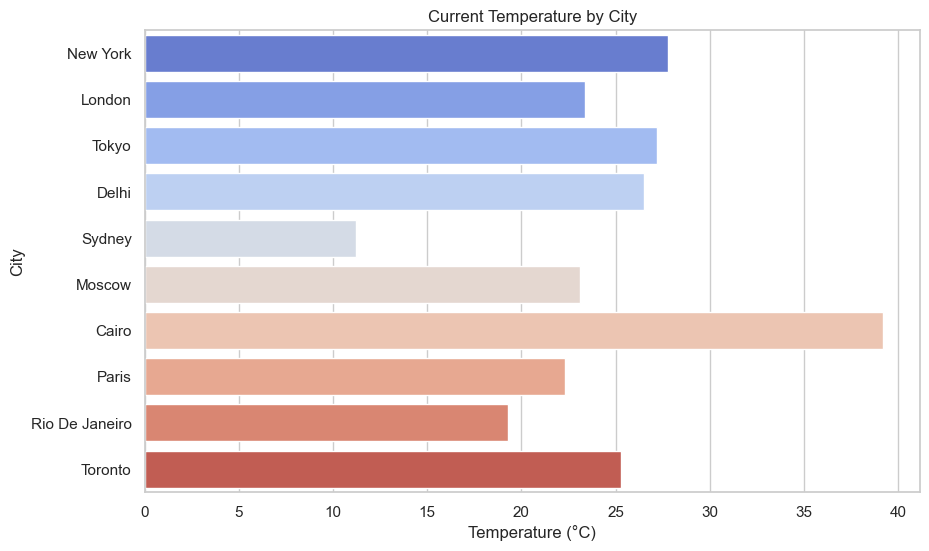

In [7]:
# Temperature Bar Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Temperature (C)', y='City', data=df, palette='coolwarm')
plt.title("Current Temperature by City")
plt.xlabel("Temperature (°C)")
plt.ylabel("City")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_16336\3537906762.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Humidity (%)', y='City', data=df, palette='Blues')


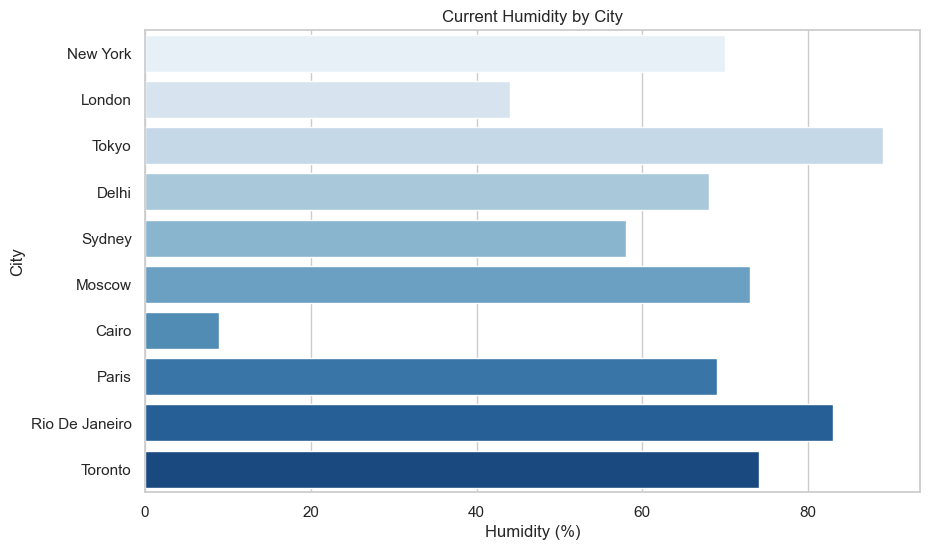

In [8]:
# Humidity Bar Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Humidity (%)', y='City', data=df, palette='Blues')
plt.title("Current Humidity by City")
plt.xlabel("Humidity (%)")
plt.ylabel("City")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_16336\3175308758.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Condition', data=df, palette='Set2')


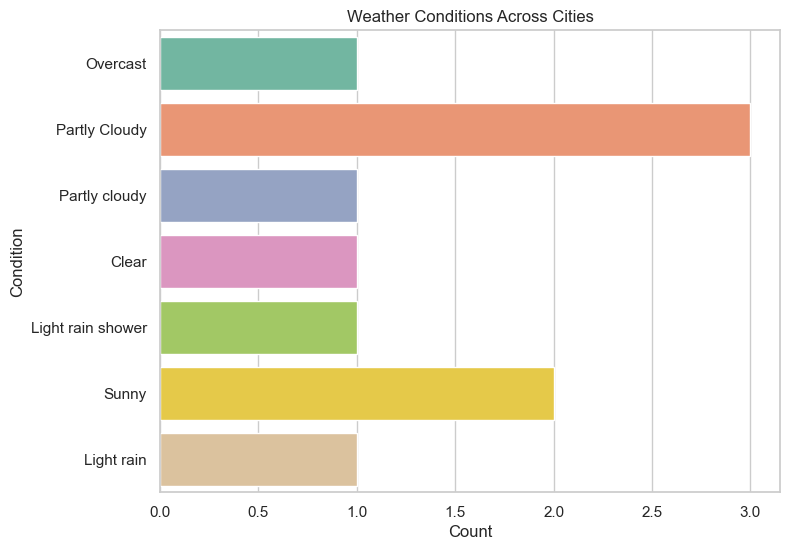

In [9]:
# Weather Condition Distribution
plt.figure(figsize=(8,6))
sns.countplot(y='Condition', data=df, palette='Set2')
plt.title("Weather Conditions Across Cities")
plt.xlabel("Count")
plt.ylabel("Condition")
plt.show()